<a href="https://colab.research.google.com/github/Mohamed-said-salah/titanic-dataset-visual-and-statistical-analysis/blob/main/notebooks/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup & Import Libraries

In [ ]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# Load dataset
df = sns.load_dataset('titanic')

# Quick overview
print("✅ Titanic dataset loaded successfully!")
print("Shape:", df.shape)
df.head()

✅ Titanic dataset loaded successfully!
Shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Initial Exploration

In [ ]:
# Dataset info
df.info()

# Missing values
print("\n🧮 Missing Values per Column:\n", df.isnull().sum())

# Basic statistics for numerical columns
df.describe()

# Summary for categorical features
df.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

🧮 Missing Values per Column:
 survived         0
pclass           0
sex       

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


# Understanding Key Features

In [ ]:
print("Columns:", list(df.columns))

# Unique values examples
for col in ['sex', 'class', 'embarked', 'who', 'deck']:
    print(f"\n🧩 {col}: {df[col].unique()}")

Columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

🧩 sex: ['male' 'female']

🧩 class: ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

🧩 embarked: ['S' 'C' 'Q' nan]

🧩 who: ['man' 'woman' 'child']

🧩 deck: [NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']


# Statistical Insights

In [ ]:
# Overall survival rate
overall_survival = df['survived'].mean()
print(f"🌍 Overall survival rate: {overall_survival:.2%}")

# Survival by gender
print("\n👩‍🦰 Survival by Gender:")
print(df.groupby('sex')['survived'].mean())

# Survival by class
print("\n💼 Survival by Class:")
print(df.groupby('class')['survived'].mean())

# Survival by age group
df['age_group'] = pd.cut(df['age'], bins=[0,12,18,30,50,80],
                         labels=['Child','Teen','Young Adult','Adult','Elder'])
print("\n👶 Survival by Age Group:")
print(df.groupby('age_group')['survived'].mean())

🌍 Overall survival rate: 38.38%

👩‍🦰 Survival by Gender:
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

💼 Survival by Class:
class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

👶 Survival by Age Group:
age_group
Child          0.579710
Teen           0.428571
Young Adult    0.355556
Adult          0.423237
Elder          0.343750
Name: survived, dtype: float64


/tmp/ipython-input-2812604750.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('class')['survived'].mean())
/tmp/ipython-input-2812604750.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('age_group')['survived'].mean())


# **Visual Exploration**


## Survival Counts

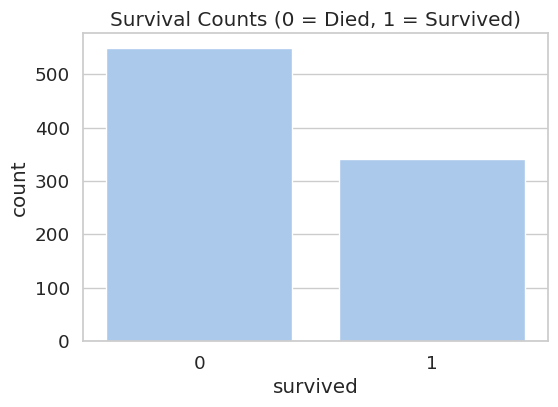

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='survived', data=df)
plt.title('Survival Counts (0 = Died, 1 = Survived)')
plt.show()

## Gender vs Survival

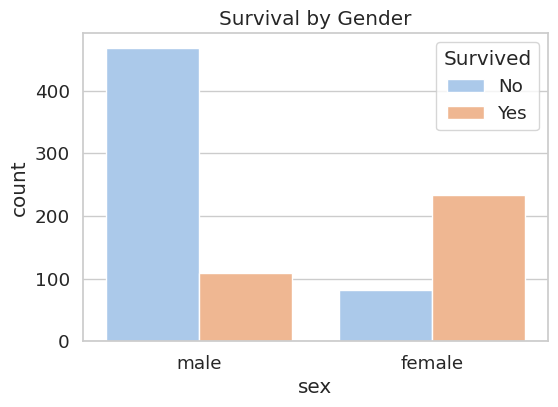

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival by Gender')
plt.legend(title='Survived', labels=['No','Yes'])
plt.show()

## Class vs Survival

/tmp/ipython-input-197485210.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='class', y='survived', data=df, ci=None)


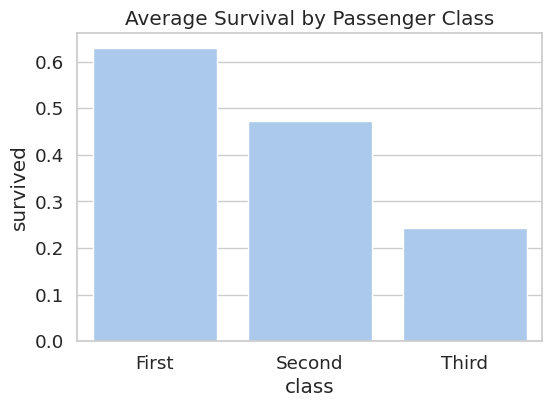

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='class', y='survived', data=df, ci=None)
plt.title('Average Survival by Passenger Class')
plt.show()

## Age Distribution

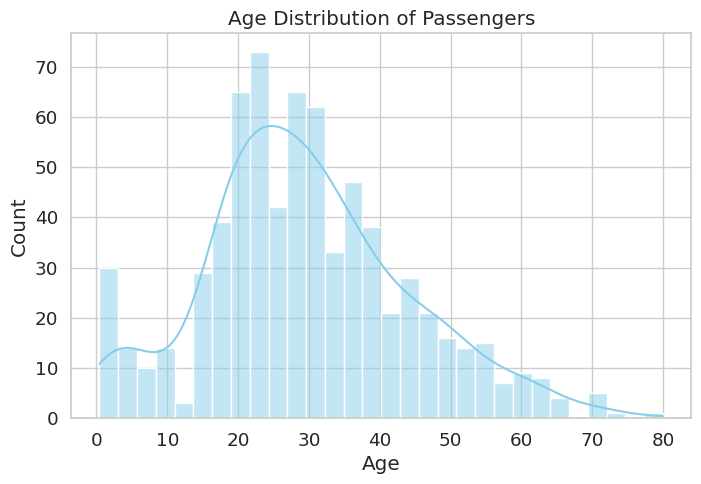

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Age vs Fare

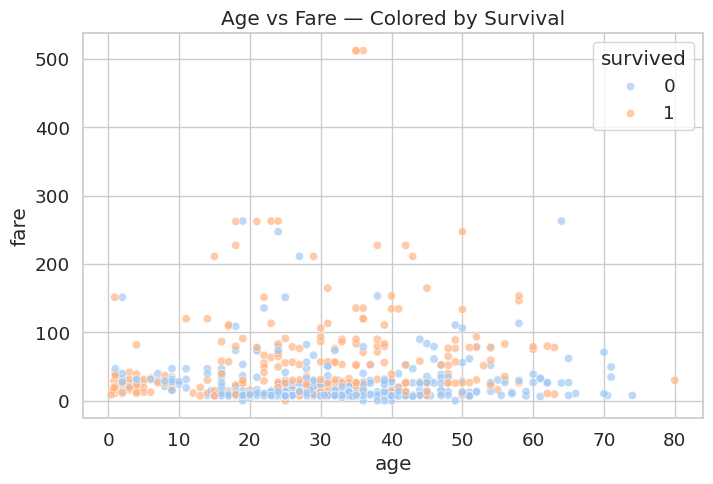

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='fare', hue='survived', data=df, alpha=0.7)
plt.title('Age vs Fare — Colored by Survival')
plt.show()

## Survival by Deck

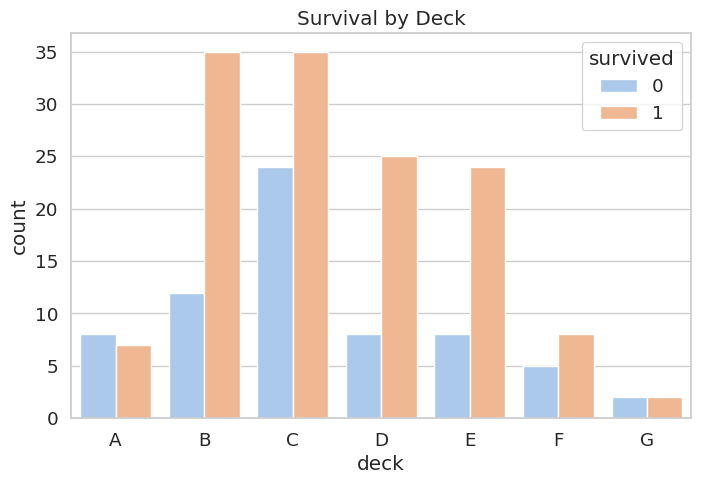

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='deck', hue='survived', data=df)
plt.title('Survival by Deck')
plt.show()

## Heatmap (Correlations)

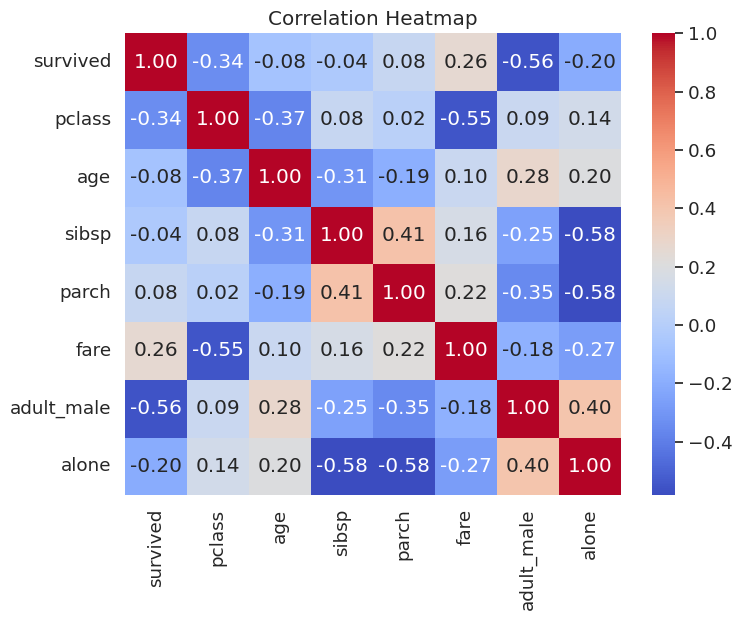

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Feature Relationships

## Class × Gender × Survival

/tmp/ipython-input-2557881329.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='class', y='survived', hue='sex', data=df, ci=None)


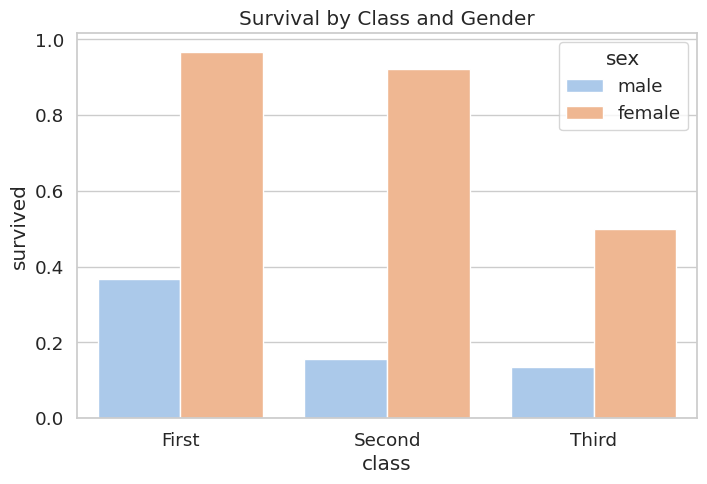

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='class', y='survived', hue='sex', data=df, ci=None)
plt.title('Survival by Class and Gender')
plt.show()

## Embarked Port × Survival

/tmp/ipython-input-3718692999.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='embarked', y='survived', data=df, ci=None)


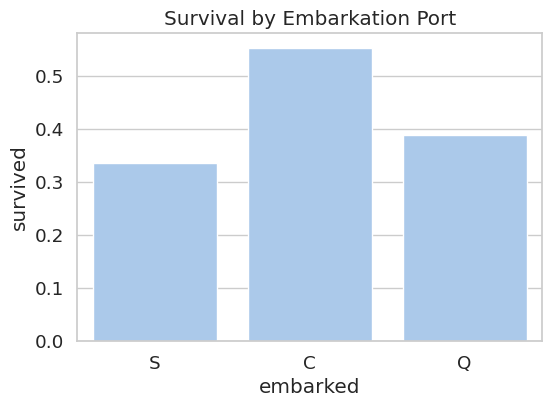

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='embarked', y='survived', data=df, ci=None)
plt.title('Survival by Embarkation Port')
plt.show()

## Family Size Impact

/tmp/ipython-input-854967572.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='family_size', y='survived', data=df, ci=None)


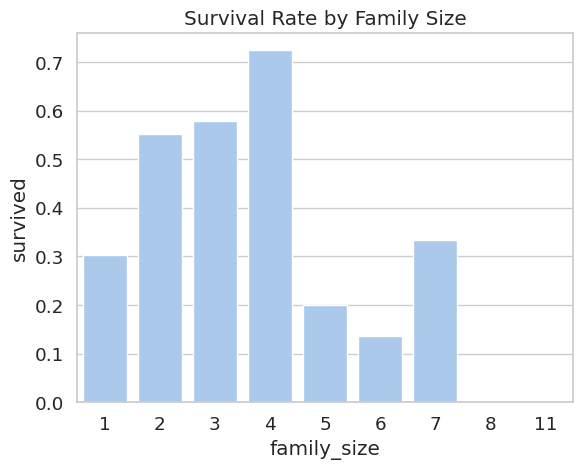

In [ ]:
df['family_size'] = df['sibsp'] + df['parch'] + 1
sns.barplot(x='family_size', y='survived', data=df, ci=None)
plt.title('Survival Rate by Family Size')
plt.show()

# Insights Summary

After running all cells, you can interpret results like:
* Females had a much higher survival rate (≈ 74 %)
* 1st class passengers had better odds than 3rd class
* Children (under 12) and small families (≤ 4) survived more
* Fare correlates positively with survival (wealthier passengers lived more)
* Deck B & C were safest; lower decks had higher fatality rates